<a href="https://colab.research.google.com/github/tanumeena28/ML-Assi1/blob/main/Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [ ]:
df = pd.read_csv('Housing.csv')

In [ ]:
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [ ]:
print(df.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [ ]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
print(df.shape)

(545, 13)


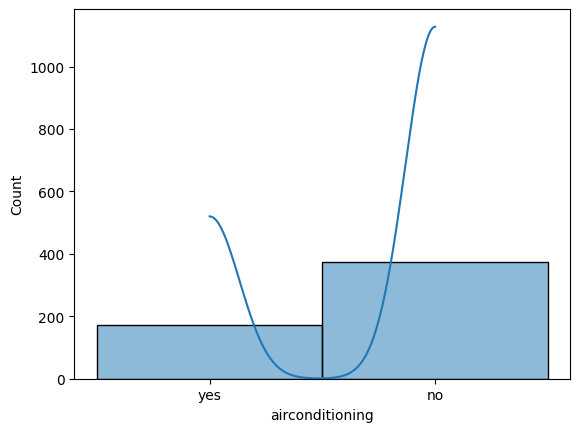

In [ ]:
sns.histplot(df['airconditioning'], kde=True)
plt.show()

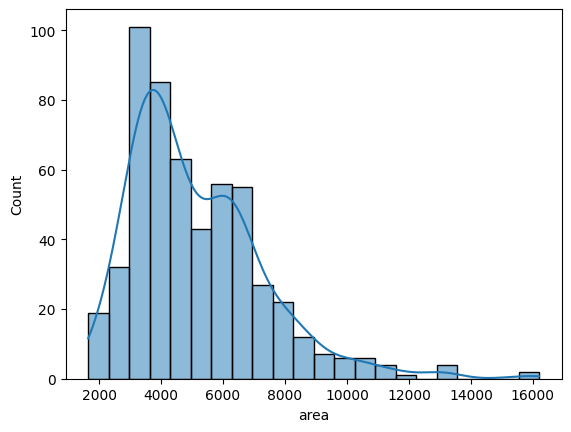

In [ ]:
sns.histplot(df['area'], kde=True)
plt.show()

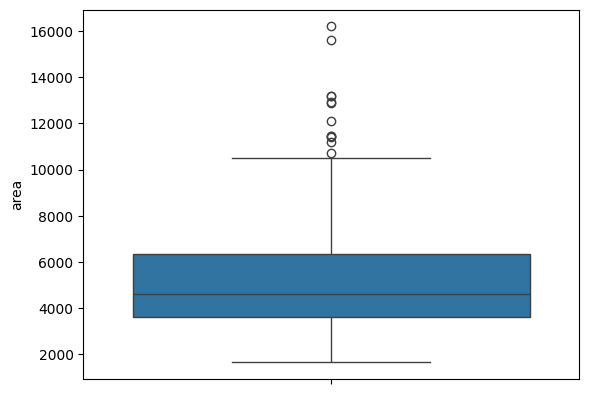

In [ ]:
sns.boxplot(df['area'])
plt.show()

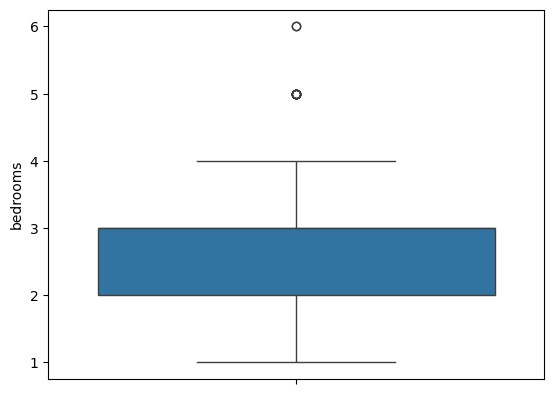

In [ ]:
sns.boxplot(df['bedrooms'])
plt.show()

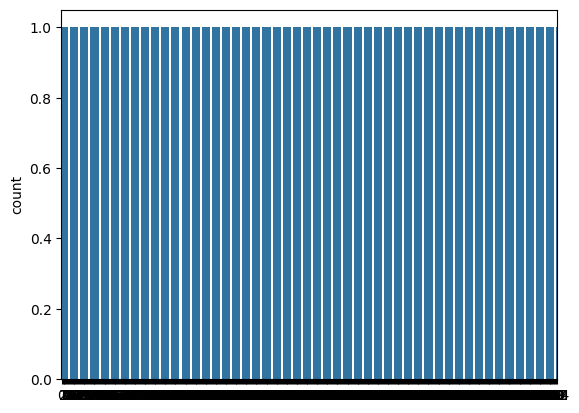

In [ ]:
sns.countplot(df['stories'])
plt.show()

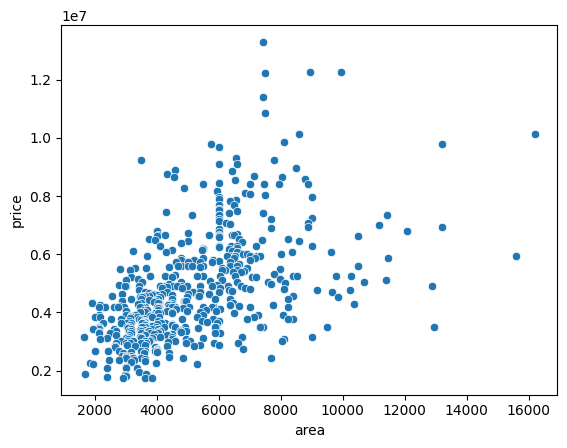

In [ ]:
sns.scatterplot(x='area', y='price', data=df)
plt.show()

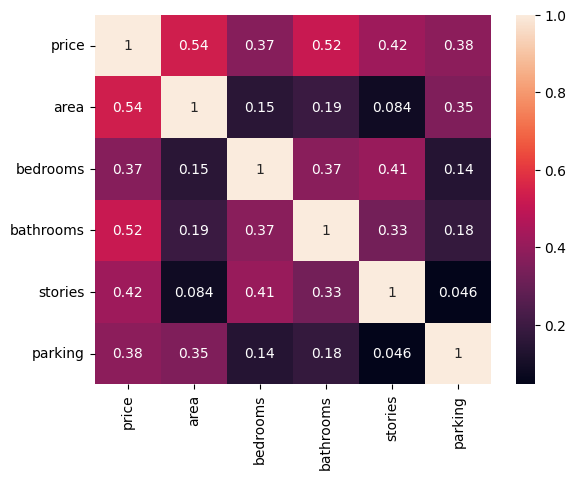

In [ ]:
corr_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"\n{col} unique values: {df[col].unique()}")



mainroad unique values: ['yes' 'no']

guestroom unique values: ['no' 'yes']

basement unique values: ['no' 'yes']

hotwaterheating unique values: ['no' 'yes']

airconditioning unique values: ['yes' 'no']

prefarea unique values: ['yes' 'no']

furnishingstatus unique values: ['furnished' 'semi-furnished' 'unfurnished']


In [ ]:
X = df[['area']]   # independent variable
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

Intercept: 2512254.2639593435
Slope: 425.72984193878284


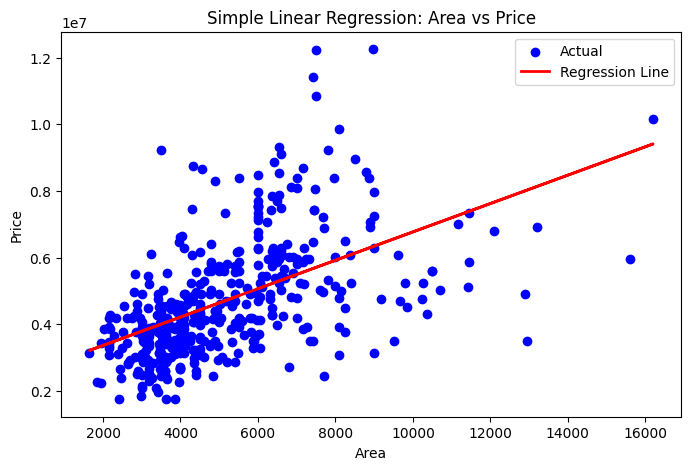

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2, label='Regression Line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Area vs Price')
plt.legend()
plt.show()


In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 3675286604768.185
R² Score: 0.27287851871974644


In [ ]:
# Example: Predict price for a house with 1000 sqft area
area_val = np.array([[1000]])
predicted_price = model.predict(area_val)

print(f"Predicted Price for 1000 sqft: ₹{predicted_price[0]:,.2f}")


Predicted Price for 1000 sqft: ₹2,937,984.11


In [29]:
X = df[['area']].values
y = df['price'].values

# Normalize (important for gradient descent)
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

In [30]:
def plot_regression(X, y, theta, title):
    plt.scatter(X, y, label="Data", alpha=0.6)
    y_pred = theta[0] + theta[1] * X
    plt.plot(X, y_pred, color='red', label="Regression Line")
    plt.title(title)
    plt.xlabel("Normalized Area")
    plt.ylabel("Normalized Price")
    plt.legend()
    plt.show()

Epoch 0: MSE = 1.0000
Epoch 100: MSE = 0.7512
Epoch 200: MSE = 0.7179
Epoch 300: MSE = 0.7134
Epoch 400: MSE = 0.7128
Epoch 500: MSE = 0.7127
Epoch 600: MSE = 0.7127
Epoch 700: MSE = 0.7127
Epoch 800: MSE = 0.7127
Epoch 900: MSE = 0.7127


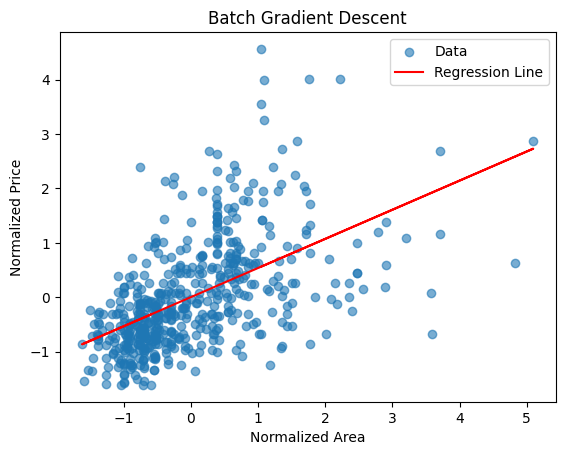

In [31]:
def batch_gradient_descent(X, y, lr=0.01, epochs=1000):
    m = len(y)
    theta = np.zeros(2)  # [bias, weight]

    for i in range(epochs):
        y_pred = theta[0] + theta[1] * X.flatten()
        error = y_pred - y
        theta[0] -= lr * error.mean()                  # update bias
        theta[1] -= lr * (error * X.flatten()).mean()  # update weight

        if i % 100 == 0:
            mse = (error ** 2).mean()
            print(f"Epoch {i}: MSE = {mse:.4f}")

    return theta

theta_batch = batch_gradient_descent(X, y)
plot_regression(X, y, theta_batch, "Batch Gradient Descent")

Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 5 complete
Epoch 6 complete
Epoch 7 complete
Epoch 8 complete
Epoch 9 complete
Epoch 10 complete


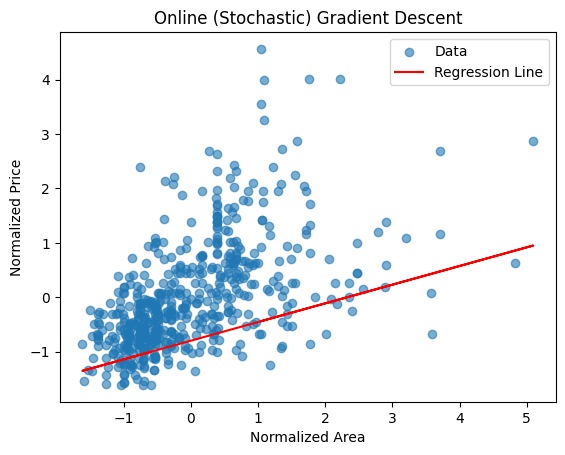

In [32]:
def online_gradient_descent(X, y, lr=0.01, epochs=10):
    m = len(y)
    theta = np.zeros(2)  # [bias, weight]

    for epoch in range(epochs):
        for i in range(m):
            xi = X[i][0]
            yi = y[i]
            y_pred = theta[0] + theta[1] * xi
            error = y_pred - yi

            theta[0] -= lr * error         # update bias
            theta[1] -= lr * error * xi    # update weight

        print(f"Epoch {epoch+1} complete")

    return theta

theta_online = online_gradient_descent(X, y)
plot_regression(X, y, theta_online, "Online (Stochastic) Gradient Descent")